# Q5 

## a.

In [53]:
# define a function 
# input: file name 
# output: a Data frame['degree', 'freq'] as degree distribution
%matplotlib inline
import matplotlib
from matplotlib import  pyplot as plt # use matplotlib's pyplot package
import math
from numpy import linalg 
import pandas as pd
import numpy as np

def getDegree(file):
    with open(file, 'r') as network:
        network_data=[] # placeholder for list of lists for data
        for entry in network:
            # strip tab delimitor
            entry_data = entry.rstrip().split(' ')
            network_data.append(entry_data)

    adj_list={}
    for edge in network_data:
        if edge[1] in list(adj_list.keys()):
            adj_list[edge[1]].append(edge[0]) # append in node to already existed list
        else :
            adj_list[edge[1]]=[edge[0]] # create a list for all in nodes 
 
    # create a list to store the in-degree of each nodes, will be used in Maximum Likelihood
    indegree=[]
    for key, value in adj_list.items():
        indegree.append(len(value))

    net_deg = pd.DataFrame({'a':indegree})
     
    # For each data set, plot the degree distribution of the social network 
    tab = pd.crosstab(index=net_deg['a'], columns="count")
    deg_freq = tab/tab.sum()
    deg_freq['degree']=deg_freq.index
    deg_freq.rename(columns={'count':'frequency'}, inplace=True)
 
 
    return(indegree, deg_freq)

# get the degree distribution for network1 and network2
nw1_indegree, nw1_deg_freq = getDegree("network1.txt")
nw2_indegree, nw2_deg_freq = getDegree("network2.txt")
 
 

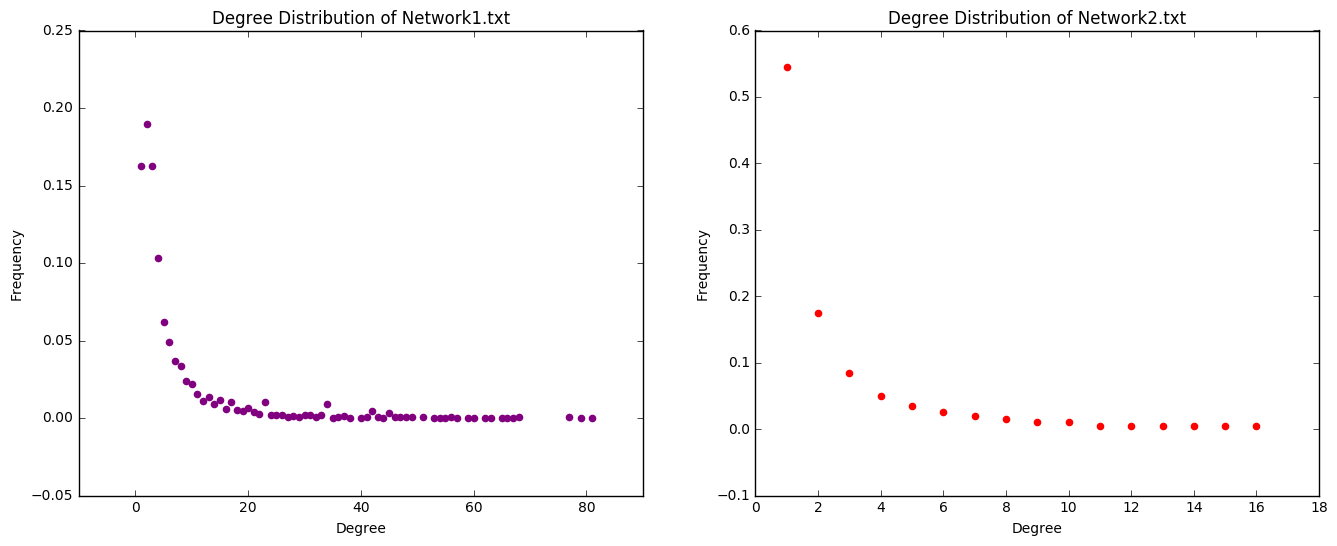

In [54]:
# plot the fraction of nodes wiht degree d on Y-axis
# degree d on X-axis
 

# network1
plt.figure(1,figsize=(16,6))
ax1 = plt.subplot(121)
plt.scatter(nw1_deg_freq['degree'], nw1_deg_freq['frequency'], color='purple')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Network1.txt")
 
# network2
 
ax1 = plt.subplot(122)
plt.scatter(nw2_deg_freq['degree'], nw2_deg_freq['frequency'], color='red')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Network2.txt")
plt.show() 

## b.

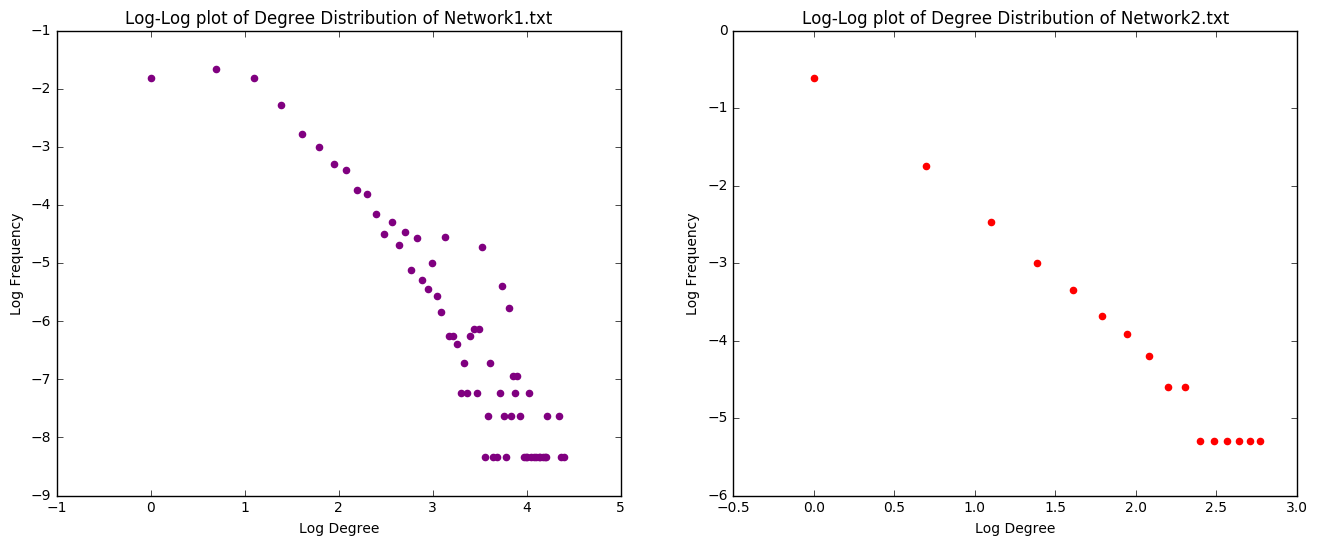

In [55]:
# log-log plot

# take logarithm for both x and y
x1=[math.log(float(i)) for i in nw1_deg_freq['degree']]
y1=[math.log(float(i)) for i in nw1_deg_freq['frequency']]

x2=[math.log(float(i)) for i in nw2_deg_freq['degree']]
y2=[math.log(float(i)) for i in nw2_deg_freq['frequency']]


# network1
plt.figure(2,figsize=(16,6))
ax1 = plt.subplot(121)
plt.scatter(x1, y1, color='purple')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log plot of Degree Distribution of Network1.txt")
 
 
# network2
ax1 = plt.subplot(122)
plt.scatter(x2, y2, color='red')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log plot of Degree Distribution of Network2.txt")
plt.show()  

 

## c.

In [56]:
# Estiamte using Ordinary Least Square

# Network 1
a=np.array(x1)
b=np.ones(len(a))
X1 = np.column_stack((b,a)) # first column in X is the intercept 1's, second column is log(degree)
Y1 = np.array(y1)

# first parameter is the intercept, second parameter is the negative alpha
par1= np.dot(np.dot(linalg.inv(np.dot(X1.T, X1)),X1.T), Y1)
alpha1_ols = abs(par1[1])
print('%s %06.4f' % ("Network 1 has alpha estimate using OLS: ", alpha1_ols))

# Network 2
a=np.array(x2)
b=np.ones(len(a))
X2 = np.column_stack((b,a)) # first column in X is the intercept 1's, second column is log(degree)
Y2 = np.array(y2)

# first parameter is the intercept, second parameter is the negative alpha
par2= np.dot(np.dot(linalg.inv(np.dot(X2.T, X2)),X2.T), Y2)
alpha2_ols = abs(par2[1])
print('%s %06.4f' % ("Network 2 has alpha estimate using OLS: ", alpha2_ols))

Network 1 has alpha estimate using OLS:  1.9741
Network 2 has alpha estimate using OLS:  1.8204


## d.

In [57]:
# Estimate using Maximum Likehood
 
# Now, our data is the observed degree of each node
temp=sum([math.log(i/min(nw1_indegree)) for i in nw1_indegree])
alpha1_mle=1+len(nw1_indegree)/temp 
print('%s %06.4f' % ("Network 1 has alpha estimate using Maximum Likehood: ", alpha1_mle))

temp=sum([math.log(i/min(nw2_indegree)) for i in nw2_indegree])
alpha2_mle=1+len(nw2_indegree)/temp 
print('%s %06.4f' % ("Network 2 has alpha estimate using Maximum Likehood: ", alpha2_mle))



Network 1 has alpha estimate using Maximum Likehood:  1.7422
Network 2 has alpha estimate using Maximum Likehood:  2.7299


## e.

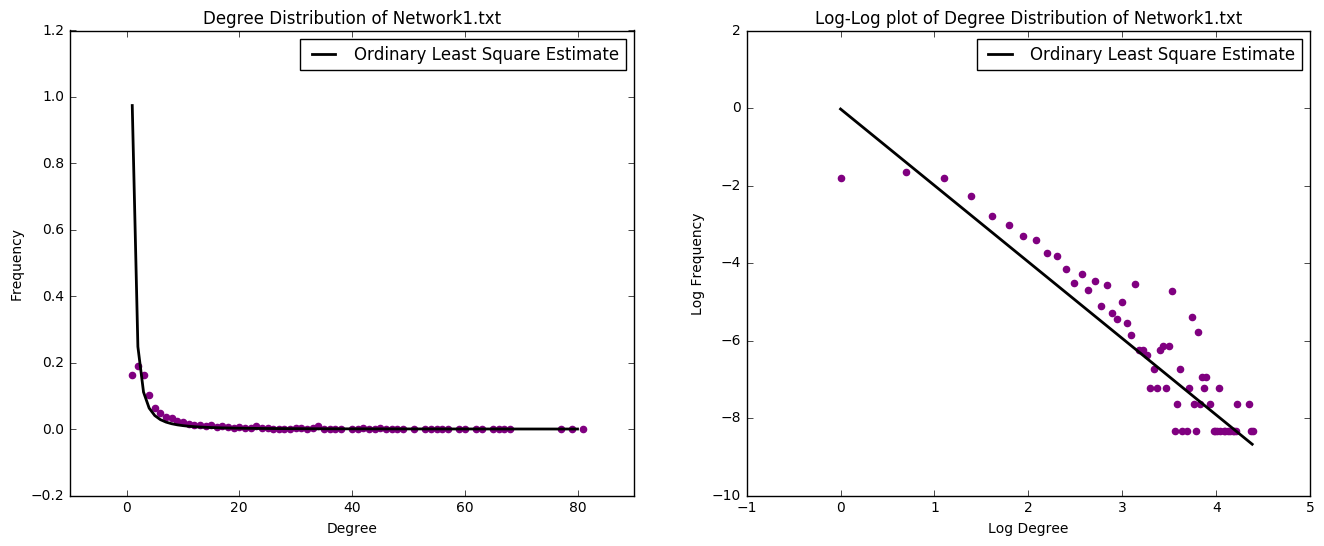

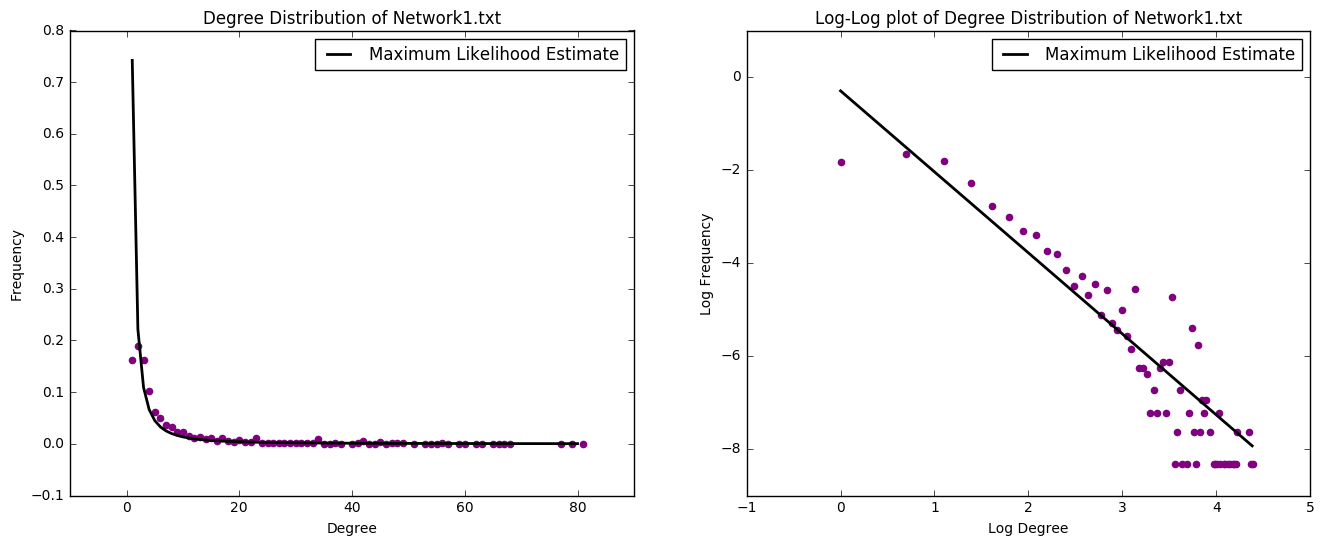

In [58]:
# plot the power law distributions for your estimates from parts (c) and (d)

### network1
# the probability density function defined using OLS or MLE
f1_ols =lambda x : ((alpha1_ols -1)/min(nw1_indegree))*(x/min(nw1_indegree))**(-alpha1_ols)
f1_mle =lambda x : ((alpha1_mle -1)/min(nw1_indegree))*(x/min(nw1_indegree))**(-alpha1_mle)
x = np.arange(min(nw1_indegree), max(nw1_indegree), 1)
 
### Check OLS for Network1
plt.figure(3,figsize=(16,6))
ax1 = plt.subplot(121)
line1,  =plt.plot(x, f1_ols(x), linewidth=2, color="black", label="Ordinary Least Square Estimate")
plt.scatter(nw1_deg_freq['degree'], nw1_deg_freq['frequency'], color='purple', label="Observed Frequency")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)

# log-log plot
# take logarithm for both x and y
x1=[math.log(float(i)) for i in nw1_deg_freq['degree']]
y1=[math.log(float(i)) for i in nw1_deg_freq['frequency']]
 
ax1 = plt.subplot(122)
line1,  =plt.plot([math.log(float(i)) for i in x], [math.log(f1_ols(i)) for i in x], linewidth=2, color="black", label="Ordinary Least Square Estimate")
plt.scatter(x1, y1, color='purple')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log plot of Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)
plt.show() 

### Check MLE for network1
plt.figure(4,figsize=(16,6))
ax1 = plt.subplot(121)
line1,  =plt.plot(x, f1_mle(x), linewidth=2, color="black", label="Maximum Likelihood Estimate")
plt.scatter(nw1_deg_freq['degree'], nw1_deg_freq['frequency'], color='purple', label="Observed Frequency")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)

# log-log plot
# take logarithm for both x and y
x1=[math.log(float(i)) for i in nw1_deg_freq['degree']]
y1=[math.log(float(i)) for i in nw1_deg_freq['frequency']]
 
ax1 = plt.subplot(122)
line1,  =plt.plot([math.log(float(i)) for i in x], [math.log(f1_mle(i)) for i in x], linewidth=2, color="black", label="Maximum Likelihood Estimate")
plt.scatter(x1, y1, color='purple')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log plot of Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)
plt.show() 



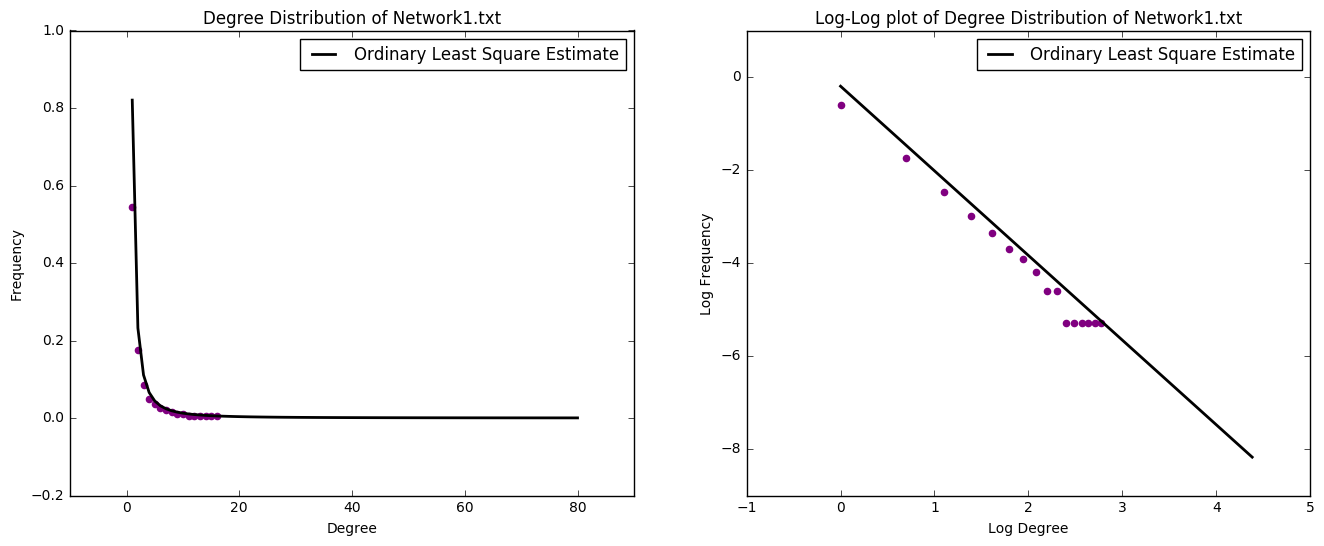

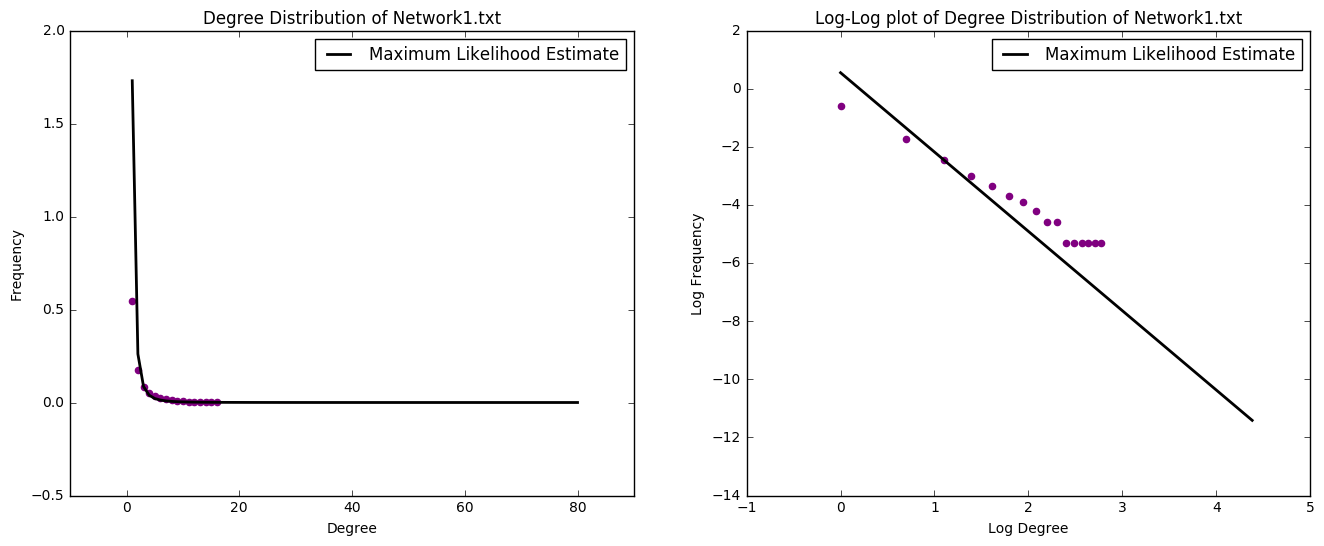

In [59]:
### network1
# the probability density function defined using OLS or MLE
f2_ols =lambda x : ((alpha2_ols -1)/min(nw2_indegree))*(x/min(nw2_indegree))**(-alpha2_ols)
f2_mle =lambda x : ((alpha2_mle -1)/min(nw2_indegree))*(x/min(nw2_indegree))**(-alpha2_mle)
x = np.arange(min(nw1_indegree), max(nw1_indegree), 1)
 
### Check OLS for Network1
plt.figure(5,figsize=(16,6))
ax1 = plt.subplot(121)
line1,  =plt.plot(x, f2_ols(x), linewidth=2, color="black", label="Ordinary Least Square Estimate")
plt.scatter(nw2_deg_freq['degree'], nw2_deg_freq['frequency'], color='purple', label="Observed Frequency")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)

# log-log plot
# take logarithm for both x and y
x1=[math.log(float(i)) for i in nw2_deg_freq['degree']]
y1=[math.log(float(i)) for i in nw2_deg_freq['frequency']]
 
ax1 = plt.subplot(122)
line1,  =plt.plot([math.log(float(i)) for i in x], [math.log(f2_ols(i)) for i in x], linewidth=2, color="black", label="Ordinary Least Square Estimate")
plt.scatter(x1, y1, color='purple')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log plot of Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)
plt.show() 

### Check MLE for network1
plt.figure(6,figsize=(16,6))
ax1 = plt.subplot(121)
line1,  =plt.plot(x, f2_mle(x), linewidth=2, color="black", label="Maximum Likelihood Estimate")
plt.scatter(nw2_deg_freq['degree'], nw2_deg_freq['frequency'], color='purple', label="Observed Frequency")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)

# log-log plot
# take logarithm for both x and y
x1=[math.log(float(i)) for i in nw2_deg_freq['degree']]
y1=[math.log(float(i)) for i in nw2_deg_freq['frequency']]
 
ax1 = plt.subplot(122)
line1,  =plt.plot([math.log(float(i)) for i in x], [math.log(f2_mle(i)) for i in x], linewidth=2, color="black", label="Maximum Likelihood Estimate")
plt.scatter(x1, y1, color='purple')
plt.xlabel("Log Degree")
plt.ylabel("Log Frequency")
plt.title("Log-Log plot of Degree Distribution of Network1.txt")
plt.legend(handles=[line1], loc=1)
plt.show() 


